In [219]:
from PIL import Image
from PIL import ImageFilter
import sys
import random
import matplotlib.pyplot as plt
import numpy as np

In [220]:
#Converting blank_form to gray scale
img = Image.open('test-images/blank_form.jpg')
img = img.convert('L')

In [221]:
#Saved answer options probabilities with stride 2.

ans_dict = {
 'A': 2,
 'B': 4,
 'C': 6,
 'D': 8,
 'E': 10,
 'AB': 12,
 'AC': 14,
 'AD': 16,
 'AE': 18,
 'BC': 20,
 'BD': 22,
 'BE': 24,
 'CD': 26,
 'CE': 28,
 'DE': 30,
 'ABC': 32,
 'ABD': 34,
 'ABE': 36,
 'ACD': 38,
 'ACE': 40,
 'ADE': 42,
 'BCD': 44,
 'BCE': 46,
 'BDE': 48,
 'CDE': 50,
 'ABCD': 52,
 'ABCE': 54,
 'ABDE': 56,
 'ACDE': 58,
 'BCDE': 60,
 'ABCDE': 62
}

In [222]:
#Getting the answer options from test file and storing only the alapbhet values excluding the question numbers
g_truth = open(f'test-images/a-3_groundtruth.txt', "r")
count = 0
ans_key = dict()
for line in g_truth:
    num, ans = line.strip().split(" ")
    num = int(num)
    ans = ans.strip()
    ans_key[num] = ans

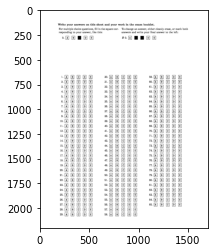

In [223]:
img_np = np.array(img)
plt.imshow(img_np, cmap='gray')

In [224]:
#Inserting zeros till the answer option values to match the count of zeros to stride values
#Removing the noise in the middle by making the space as white between options.
sp = 0
for i in range(1,86):
    key = ans_key[i]
    if key not in ans_dict:
        continue  
    l = ans_dict[ans_key[i]]
    for j in range(50,110):
        for k in range(55+sp,55+sp+l):
            img_np[j][k] = 0
        for k in range(55+sp+l, 57+sp+l):
            img_np[j][k] = 255
    sp += l + 2

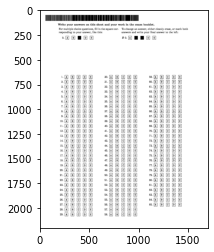

In [225]:
plt.imshow(img_np, cmap = 'gray')

In [226]:
plt.imsave('inject.jpg', img_np, cmap='gray')

In [227]:
im_test = img = Image.open('inject.jpg')
im_test.show()